In [56]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv('spam.csv')
# 1 is spam , 0 is ham.

In [58]:
df.sample(5)

,label,text
2096,0,"today , friday , march 22 , steve cooper left ..."
18667,0,author jra date escapenumber escapenumber esca...
53106,0,i finally moved us to a new mail server setup ...
43071,1,solid stainless steel replicas tffdrescapenumb...
61009,0,but afaiui the purpose of this informational ...


In [59]:
df.shape

(83448, 2)

In [60]:
#1 Data Cleaning 
#2 EDA 
#3 Text Preprocessing 
#4 Model Build 
#5 Model Evaluation 
#6 Improve Model 
#7 Deploy Model 

## 1. Data Cleaning 

In [61]:
df.isnull().sum() 

label    0
text     0
dtype: int64

In [62]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
df = df.drop_duplicates(keep='first') 

In [65]:
df.duplicated().sum()

np.int64(0)

## 2. EDA

In [66]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

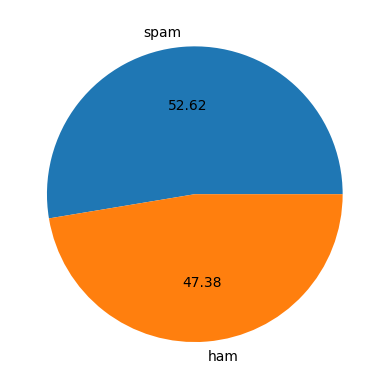

In [67]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts() , labels=['spam' , 'ham'] , autopct='%.2f')
plt.show()

In [68]:
pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [69]:
import nltk

In [70]:
#from intution , spam mails will have more characters.

In [71]:
df['no. of char'] = df['text'].apply(len)

In [72]:
df

,label,text,no. of char
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362
...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589
83444,1,now you can order software on cd or download i...,616
83445,1,dear valued member canadianpharmacy provides a...,534
83446,0,subscribe change profile contact us long term ...,2113


In [73]:
import seaborn as sns

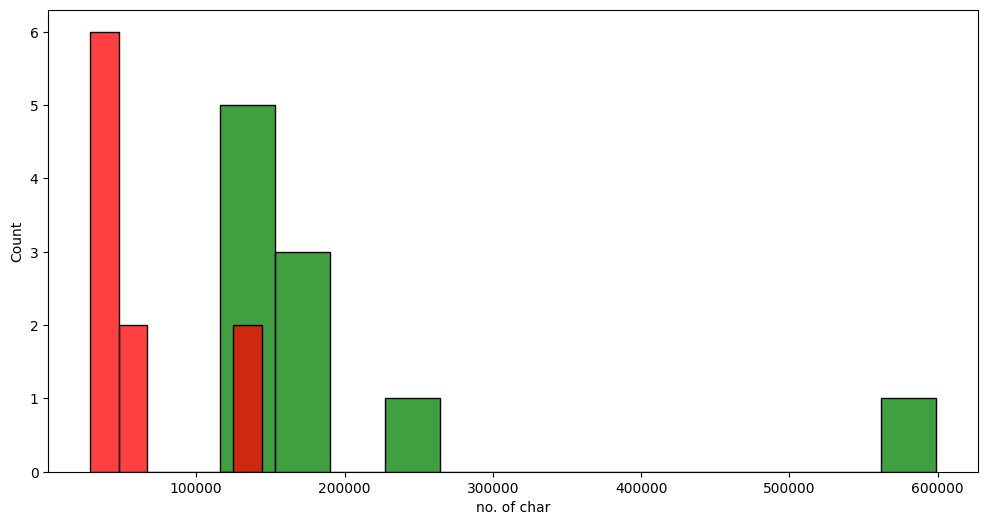

In [74]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['no. of char'].nlargest(10) , color='green')
sns.histplot(df[df['label'] == 1]['no. of char'].nlargest(10) , color='red')

plt.show()

In [75]:
df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))

In [76]:
df['num_words'].nlargest(5)

52108    101984
51996     45448
475       34898
68692     33037
47211     28001
Name: num_words, dtype: int64

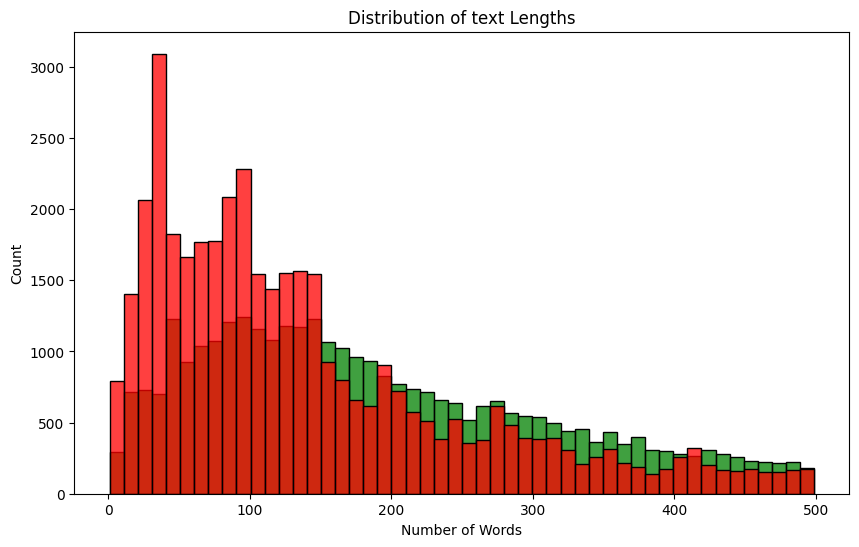

In [77]:
df_short = df[df['num_words'] < 500] 

plt.figure(figsize=(10, 6))
sns.histplot(df_short[df_short['label'] == 0]['num_words'], bins=50, color='green')
sns.histplot(df_short[df_short['label'] == 1]['num_words'], bins=50, color='red')
plt.title("Distribution of text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Count")

plt.show()


In [78]:
#Here we see that spam messages have lesser number of words

In [79]:
import re

def fast_sentence_count(text):
    text = str(text)
    sentences = re.findall(r'[.!?]+', text)
    return max(1, len(sentences)) # Assume at least 1 sentence if text exists

df['num_sentences'] = df['text'].apply(fast_sentence_count)

In [80]:
df.sample(7)

,label,text,no. of char,num_words,num_sentences
34202,1,profile name faked landings hundred valid reas...,106,14,1
63291,0,the enron bod approved the some limit changes ...,5652,999,41
7707,0,on may escapenumber escapenumber escapenumber ...,1292,232,1
57550,1,body\npwell hello there .\nsign up for fere an...,512,115,11
75601,0,on thu escapenumber jul escapenumber escapenum...,1027,167,1
77181,1,anatrim  the latest and most enchanting produ...,1876,337,1
66789,0,start date : 12 / 21 / 01 ; hourahead hour : 1...,117,23,2


In [81]:
df['text'][3]

'university degree obtain a prosperous future money earning power and the prestige that comes with having the career position you\x92ve always dreamed of diploma from prestigious non accredited unversities based on your present knowledge and professional experience if you qualify no required tests classes books or examinations confidentiality assured escapenumber escapenumber escapenumber escapenumber escapenumber hours a day escapenumber days a week including sundays and holidays sun escapenumber jun escapenumber escapenumber escapenumber escapenumber escapenumbershall borrowfor you have '

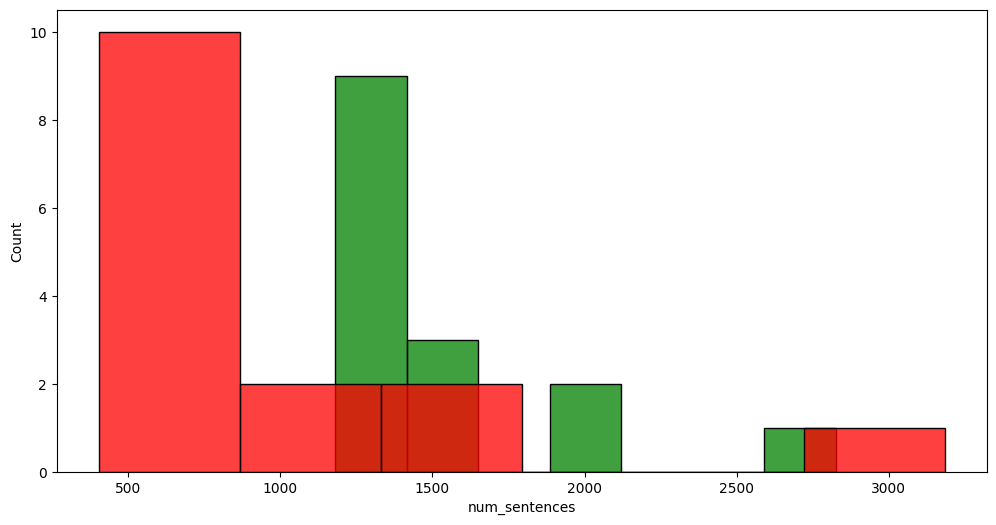

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'].nlargest(15) , color='green')
sns.histplot(df[df['label'] == 1]['num_sentences'].nlargest(15), color='red')

plt.show()

In [83]:
# Here too , the number of sentences are lesser for spam mails. 
# Could imply that genuine emails are longer and more elaborate.

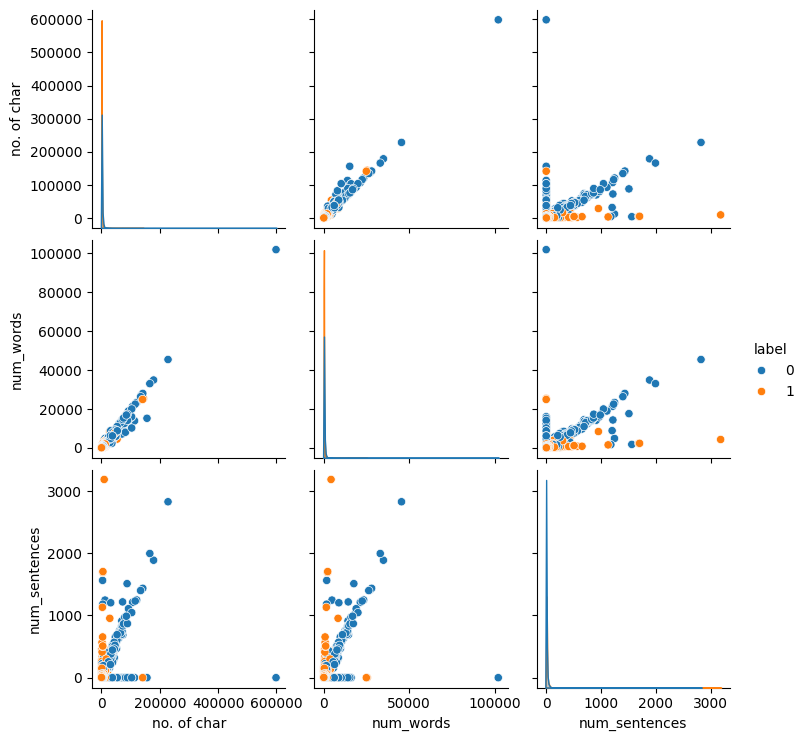

In [84]:
sns.pairplot(df,hue='label')

<Axes: >

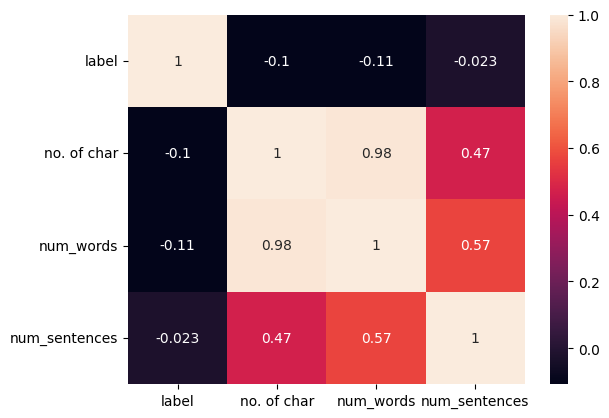

In [85]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [86]:
# let us drop some columns now
# df = df.drop(columns=['no. of char','num_words']) # Error as cell ran twice.

In [87]:
df

,label,text,no. of char,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,103,1
2,0,computer connection from cnn com wednesday es...,2235,337,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,222,1
...,...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589,341,1
83444,1,now you can order software on cd or download i...,616,118,24
83445,1,dear valued member canadianpharmacy provides a...,534,76,1
83446,0,subscribe change profile contact us long term ...,2113,277,1


## 3. Text Preprocessing 
--> Lower case 

--> Tokenization

--> Removing special characters

--> Removing stop words and punctuation

--> Stemming

In [88]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


False

In [89]:
import string
from nltk.stem.porter import PorterStemmer

In [90]:
ps = PorterStemmer()

stop_words = set(stopwords.words('english')) 
punct = set(string.punctuation)

def transform_text(text):
    text = text.lower()

    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words and i not in punct:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

            
    return y

In [91]:
transform_text('Hi can WE NOt meet BADLY ! i https/: want')

['hi', 'meet', 'badli', 'want']

In [92]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

tokenizer = nltk.word_tokenize 


def PreProcessedText(text):
    # lowercase + remove URLs first
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    tokens = tokenizer(text)

    result = []
    append = result.append      

    for tok in tokens:
        if tok.isalnum() and tok not in stop_words:
            append(ps.stem(tok))

    return result


In [93]:
PreProcessedText('Hi can WE NOt meet BADLY ! i https: want ')

['hi', 'meet', 'badli', 'http', 'want']

In [95]:
df['transformed_text'] = df['text'].apply(PreProcessedText)

In [96]:
df

,label,text,no. of char,num_words,num_sentences,transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1,"[ounc, feather, bowl, hummingbird, opec, momen..."
1,1,wulvob get your medircations online qnb ikud v...,808,103,1,"[wulvob, get, medirc, onlin, qnb, ikud, viagra..."
2,0,computer connection from cnn com wednesday es...,2235,337,1,"[comput, connect, cnn, com, wednesday, escapen..."
3,1,university degree obtain a prosperous future m...,592,76,1,"[univers, degre, obtain, prosper, futur, money..."
4,0,thanks for all your answers guys i know i shou...,1362,222,1,"[thank, answer, guy, know, check, rsync, manua..."
...,...,...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589,341,1,"[hi, given, date, get, last, date, month, data..."
83444,1,now you can order software on cd or download i...,616,118,24,"[order, softwar, cd, download, site, immedi, d..."
83445,1,dear valued member canadianpharmacy provides a...,534,76,1,"[dear, valu, member, canadianpharmaci, provid,..."
83446,0,subscribe change profile contact us long term ...,2113,277,1,"[subscrib, chang, profil, contact, us, long, t..."


In [97]:
 df["transformed_text"] = df["transformed_text"].apply(lambda x: " ".join(x))

In [ ]:
# wordcloud used later.

In [98]:
import wordcloud

In [99]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [101]:
df["transformed_text"] = df["transformed_text"].str.replace(r"\bescape\w*\b", "", regex=True)
df["transformed_text"] = df["transformed_text"].str.replace(r"\s+", " ", regex=True).str.strip()

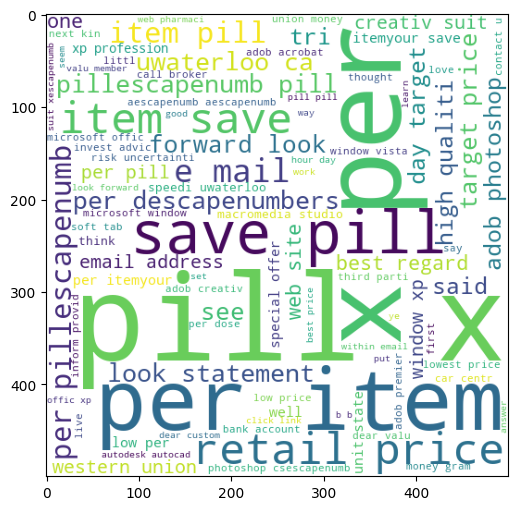

In [102]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

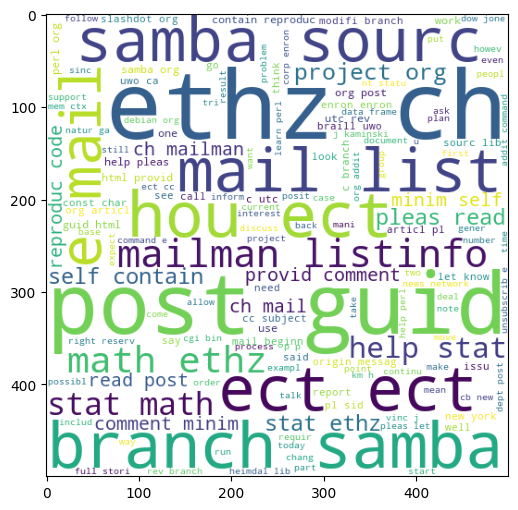

In [105]:
spam_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [106]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word) 

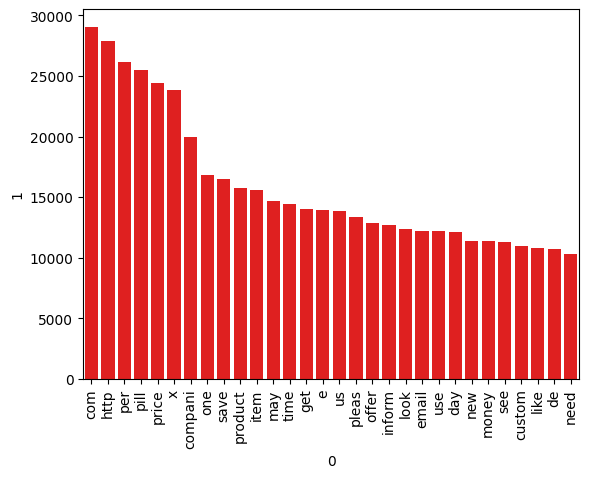

In [107]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], color='red')
plt.xticks(rotation='vertical')
plt.show()

In [108]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

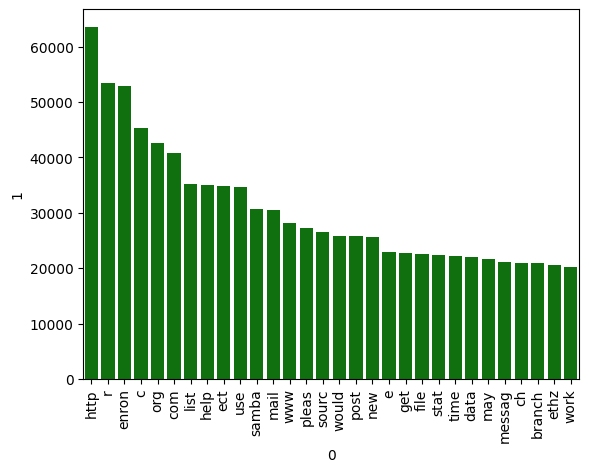

In [109]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1] , color='green')
plt.xticks(rotation='vertical')
plt.show()

In [110]:
# Ignoring the first few now , We see that Spam contains marketing words whereas Ham contains day-to-day words.

## 4. Model Building

In [111]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

In [112]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [113]:
y = df['label'].values 

In [114]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [116]:
gnb = GaussianNB() 

In [117]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.962432594367885
[[7553  385]
 [ 242 8510]]
0.9567172568858909


In [118]:
mnb = MultinomialNB()

In [119]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9623726782504494
[[7652  286]
 [ 342 8410]]
0.9671113155473781


In [120]:
bnb = BernoulliNB()

In [121]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9016776512881965
[[6810 1128]
 [ 513 8239]]
0.879577239244155


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [124]:
svc = SVC(kernel='sigmoid')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5 , max_features='sqrt')
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [125]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc
}

In [126]:
def Classifier(clf, X_train, y_train, X_test, y_test) :
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    Accuracy = (accuracy_score(y_test,y_pred))
    Precision = (precision_score(y_test,y_pred))

    return Accuracy, Precision

In [127]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = Classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9771719592570401
Precision -  0.9761119326584007
For  KN
Accuracy -  0.8406830437387657
Precision -  0.7679183888840032
For  NB
Accuracy -  0.9623726782504494
Precision -  0.9671113155473781
For  DT
Accuracy -  0.681725584182145
Precision -  0.6249092229484386
For  LR
Accuracy -  0.9830437387657279
Precision -  0.9784205174556547
For  RF
Accuracy -  0.9847813061713601
Precision -  0.9841613491340018


In [128]:
# Using Random Forest

In [129]:
rfc = RandomForestClassifier(n_estimators=50, warm_start=True, random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
Accuracy = (accuracy_score(y_test,y_pred))
Precision = (precision_score(y_test,y_pred))

In [130]:
print(Accuracy)
print(Precision)

0.9846015578190533
0.9847084331849824


(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [131]:
from sklearn.metrics import recall_score
Recall = (recall_score(y_test,y_pred))
print(Recall)

0.9859460694698354


In [135]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, warm_start=True, random_state=2)
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [138]:
voting = VotingClassifier(estimators=[('lr', lrc), ('rf', rfc) ],voting='soft')

In [139]:
voting.fit(X_train,y_train)

y_pred_1 = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred_1))
print("Precision",precision_score(y_test,y_pred_1))
print("Recall",recall_score(y_test,y_pred_1))

Accuracy 0.9869382863990414
Precision 0.9834579651031045
Recall 0.9917733089579525


In [140]:
import pickle

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))